# NEXT TRY

In [3]:
import numpy as np
import pandas as pd
import os

In [9]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Datasoot/AUML_Data/lfwpeople/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/Datasoot/AUML_Data/lfwpeople/Face Detection_LFW/lfw-funneled.tgz
/content/drive/MyDrive/Datasoot/AUML_Data/lfwpeople/Face Detection_LFW/pairs.txt
/content/drive/MyDrive/Datasoot/AUML_Data/lfwpeople/Face Detection_LFW/pairsDevTrain.txt
/content/drive/MyDrive/Datasoot/AUML_Data/lfwpeople/Face Detection_LFW/pairsDevTest.txt


In [10]:

from time import time
import errno
import shutil
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [12]:
def copy(src, dest):
    try:
        shutil.copytree(src, dest)
    except OSError as e:
        if e.errno == errno.ENOTDIR:
            shutil.copy(src, dest)
        else:
            print('Directory not copied. Error: %s' % e)

src = '/content/drive/MyDrive/Datasoot/AUML_Data/lfwpeople/'
dest = '/content/drive/MyDrive/Datasoot/AUML_Data/lfwpeople/Face Detection_LFW/'
copy(src,dest)
print(os.listdir('/content/drive/MyDrive/Datasoot/AUML_Data/lfwpeople'))
print(os.listdir('/content/drive/MyDrive/Datasoot/AUML_Data/lfwpeople/Face Detection_LFW'))


###### write_available_area
print(os.listdir('/content/drive/MyDrive/Datasoot/AUML_Data/LFW'))
print(os.listdir('/content/drive/MyDrive/Datasoot/AUML_Data/LFW/lfw_home/'))
print(os.listdir('/content/drive/MyDrive/Datasoot/AUML_Data/LFW/lfw_home/Face Detection_LFW'))

path = '/content/drive/MyDrive/Datasoot/AUML_Data/LFW'

Directory not copied. Error: [Errno 17] File exists: '/content/drive/MyDrive/Datasoot/AUML_Data/lfwpeople/Face Detection_LFW/'
['Face Detection_LFW']
['lfw-funneled.tgz', 'pairs.txt', 'pairsDevTrain.txt', 'pairsDevTest.txt']
['lfw_home']
['Face Detection_LFW', 'pairsDevTrain.txt', 'pairsDevTest.txt', 'pairs.txt', 'lfw_funneled', 'joblib']
['lfw-funneled.tgz', 'pairsDevTest.txt', 'pairsDevTrain.txt', 'pairs.txt']


In [13]:
lfw_people=fetch_lfw_people(data_home=path,min_faces_per_person=50, resize=0.5)

In [14]:
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("\tnumber of samples: %d" % n_samples)
print("\tnumber of features: %d" % n_features)
print("\tnumber of classes: %d" % n_classes)

Total dataset size:
	number of samples: 1560
	number of features: 2914
	number of classes: 12


In [15]:
N=[]
for i in range(len(target_names)):
    N+=[i]
mapping=dict(zip(target_names,N))
reverse_mapping=dict(zip(N,target_names))
def mapper(value):
    return reverse_mapping[value]

In [16]:
x = lfw_people.data
np.isnan(np.sum(x))
np.isnan(np.sum(y))

False

<Axes: ylabel='count'>

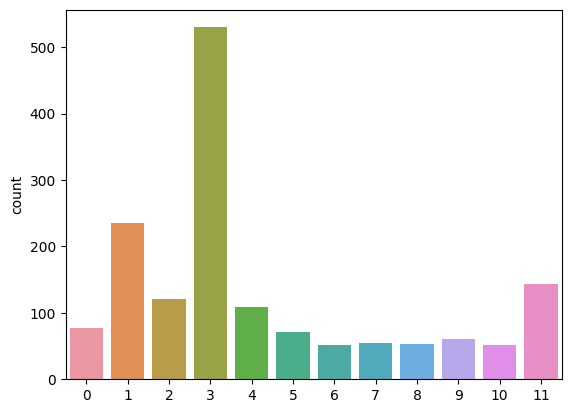

In [17]:
sns.countplot(x ="target",data = lfw_people)

In [18]:
print(X.shape, y.shape)
X.shape

(1560, 2914) (1560,)


(1560, 2914)

In [19]:
indeces = []
for i in range(300, X.shape[0]):
    if y[i] == 3:
        indeces.append(i)
print(X.shape, y.shape)
X = np.delete(X, indeces,0)
y = np.delete(y, indeces, 0)
print(X.shape, y.shape)

(1560, 2914) (1560,)
(1136, 2914) (1136,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

# KNN


<Axes: >

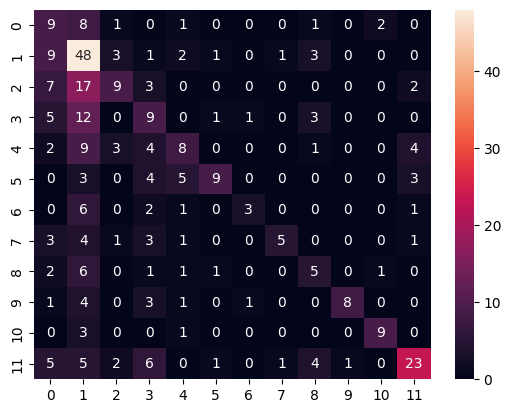

In [21]:
from sklearn.multiclass import OneVsRestClassifier
Knn_model =  KNeighborsClassifier(n_neighbors = 4)
Knn_model.fit(X_train, y_train)
predicted = Knn_model.predict(X_test)
cm = confusion_matrix(y_test, predicted) #model biased (class = 3, data undersampled)
sns.heatmap(cm, annot=True)

In [22]:
classi_report = classification_report(y_test,predicted)
print(classi_report)
KNN = accuracy_score(y_test,predicted)
KNN

              precision    recall  f1-score   support

           0       0.21      0.41      0.28        22
           1       0.38      0.71      0.50        68
           2       0.47      0.24      0.32        38
           3       0.25      0.29      0.27        31
           4       0.38      0.26      0.31        31
           5       0.69      0.38      0.49        24
           6       0.60      0.23      0.33        13
           7       0.71      0.28      0.40        18
           8       0.29      0.29      0.29        17
           9       0.89      0.44      0.59        18
          10       0.75      0.69      0.72        13
          11       0.68      0.48      0.56        48

    accuracy                           0.43       341
   macro avg       0.53      0.39      0.42       341
weighted avg       0.49      0.43      0.43       341



0.4252199413489736

In [23]:
true_values =[ mapper(i) for i in y_test]
print(true_values)
predicted_values = [mapper(i) for i in predicted]
print(predicted_values)

['Tony Blair', 'Gerhard Schroeder', 'George W Bush', 'Colin Powell', 'Jacques Chirac', 'Gerhard Schroeder', 'Ariel Sharon', 'George W Bush', 'Colin Powell', 'John Ashcroft', 'Tony Blair', 'Ariel Sharon', 'Colin Powell', 'Tony Blair', 'John Ashcroft', 'John Ashcroft', 'Hugo Chavez', 'Tony Blair', 'John Ashcroft', 'Colin Powell', 'Donald Rumsfeld', 'Tony Blair', 'Gerhard Schroeder', 'Tony Blair', 'Serena Williams', 'Colin Powell', 'Jean Chretien', 'George W Bush', 'John Ashcroft', 'Colin Powell', 'Gerhard Schroeder', 'Colin Powell', 'Jean Chretien', 'Serena Williams', 'Donald Rumsfeld', 'George W Bush', 'Colin Powell', 'Colin Powell', 'Colin Powell', 'Gerhard Schroeder', 'George W Bush', 'Ariel Sharon', 'Jacques Chirac', 'Ariel Sharon', 'Hugo Chavez', 'George W Bush', 'George W Bush', 'Gerhard Schroeder', 'Serena Williams', 'Donald Rumsfeld', 'Junichiro Koizumi', 'Tony Blair', 'Tony Blair', 'Junichiro Koizumi', 'Donald Rumsfeld', 'Tony Blair', 'Colin Powell', 'Jean Chretien', 'George W B

# KDTree

<Axes: >

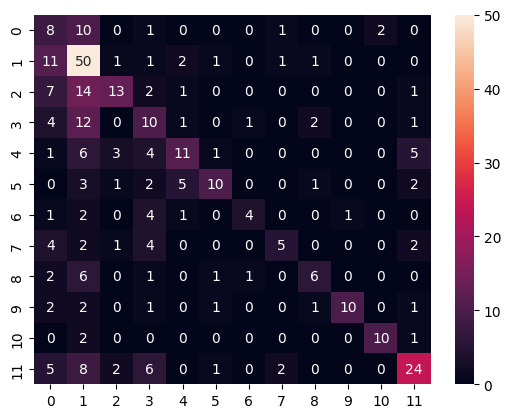

In [24]:
Knn_model_kdtree = KNeighborsClassifier(n_neighbors = 4,algorithm = 'kd_tree', p=1)
Knn_model_kdtree.fit(X_train, y_train)
predicted = Knn_model_kdtree.predict(X_test)
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot=True)

In [25]:
classi_report = classification_report(y_test,predicted)
print(classi_report)
KDTREE=accuracy_score(y_test,predicted)
KDTREE

              precision    recall  f1-score   support

           0       0.18      0.36      0.24        22
           1       0.43      0.74      0.54        68
           2       0.62      0.34      0.44        38
           3       0.28      0.32      0.30        31
           4       0.52      0.35      0.42        31
           5       0.67      0.42      0.51        24
           6       0.67      0.31      0.42        13
           7       0.56      0.28      0.37        18
           8       0.55      0.35      0.43        17
           9       0.91      0.56      0.69        18
          10       0.83      0.77      0.80        13
          11       0.65      0.50      0.56        48

    accuracy                           0.47       341
   macro avg       0.57      0.44      0.48       341
weighted avg       0.54      0.47      0.48       341



0.47214076246334313

# PCA

In [26]:
pca = PCA(n_components=150,random_state=42)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

<Axes: >

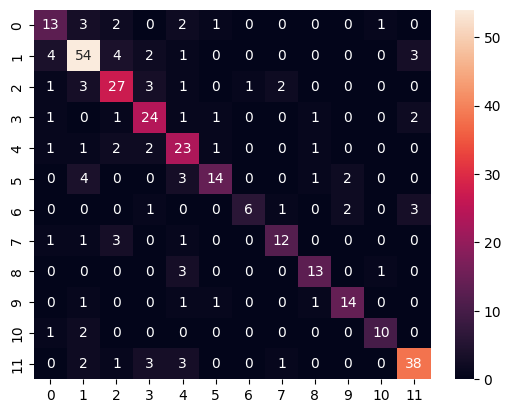

In [27]:
svm_model = SVC(random_state=42,C=1, kernel='linear')
svm_model.fit(X_train_pca, y_train)
predicted = svm_model.predict(X_test_pca)
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot=True)

In [28]:
classi_report = classification_report(y_test, predicted)
print(classi_report)
PSVM=accuracy_score(y_test,predicted)
PSVM

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        22
           1       0.76      0.79      0.78        68
           2       0.68      0.71      0.69        38
           3       0.69      0.77      0.73        31
           4       0.59      0.74      0.66        31
           5       0.78      0.58      0.67        24
           6       0.86      0.46      0.60        13
           7       0.75      0.67      0.71        18
           8       0.76      0.76      0.76        17
           9       0.78      0.78      0.78        18
          10       0.83      0.77      0.80        13
          11       0.83      0.79      0.81        48

    accuracy                           0.73       341
   macro avg       0.74      0.70      0.71       341
weighted avg       0.74      0.73      0.73       341



0.7272727272727273

# Visualing the train and test data

In [29]:
true_values =[ mapper(i) for i in y_test]
predicted_values = [mapper(i) for i in predicted]

In [30]:
def plot_faces(images, n_row, n_col, true_label, predicted_label, title):
    """Helper function to plot a gallery of portraits"""

    plt.figure(figsize=(2.5 * n_col, 3.3 * n_row))
#     plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
#         print("True:",true_label[i])
        plt.title(f'Predicted: {predicted_label[i]}')
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xlabel(true_label[i])
#         print("Predicted: ",predicted_label[i])
        plt.xticks(())
        plt.yticks(())
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

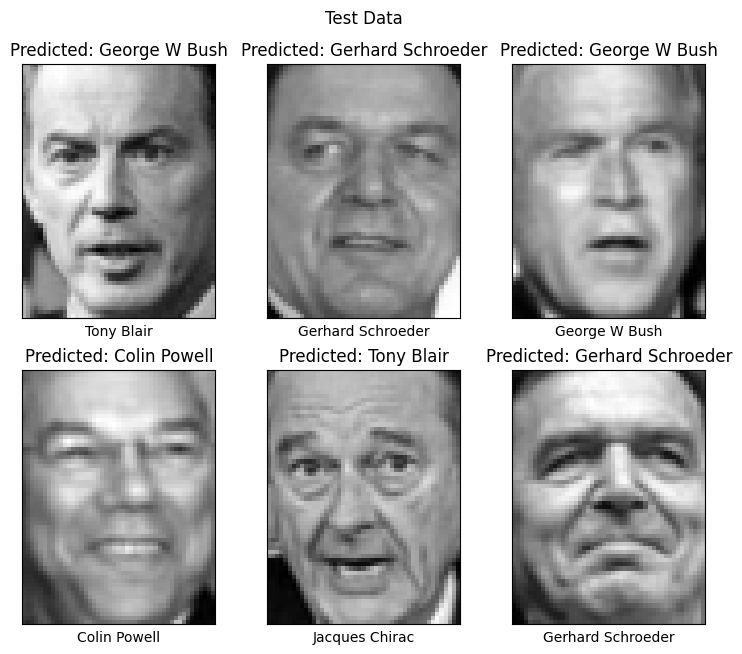

In [31]:
true_values =[ mapper(i) for i in y_test]
predicted_values = [mapper(i) for i in predicted]
Faces = plot_faces(X_test[:6],2,3,true_values[:6], predicted_values[:6], title='Test Data')

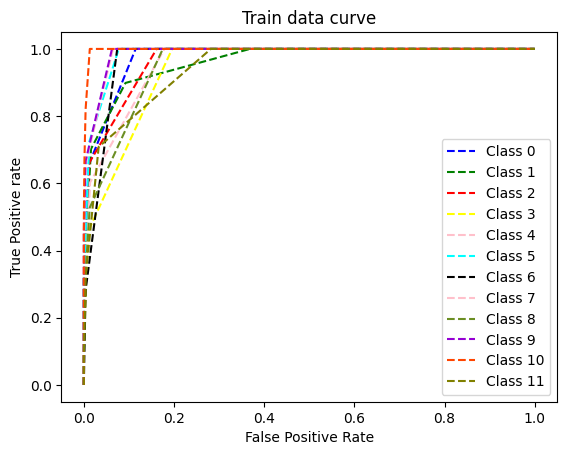

In [32]:
# import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score,roc_curve
fpr = {}
tpr = {}
thresh ={}
colors = ['blue','green','red','yellow','pink','cyan','black','pink','olivedrab','darkviolet','orangered','olive']
n_class = 12
pred_prob = Knn_model_kdtree.predict_proba(X_train)

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_train, pred_prob[:,i], pos_label=i)
    plt.plot(fpr[i], tpr[i], linestyle='--',color=colors[i], label=f'Class {i}')


plt.title('Train data curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

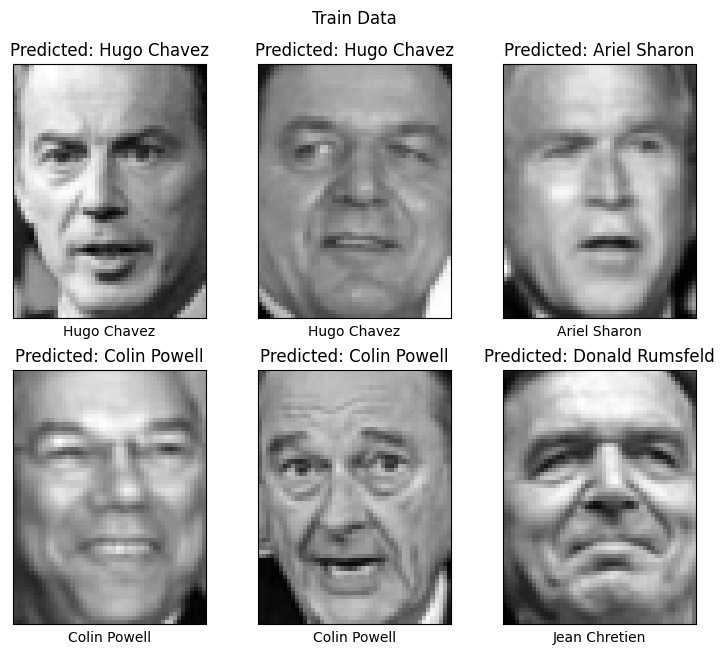

In [33]:
true_values =[ mapper(i) for i in y_train]
predicted = Knn_model_kdtree.predict(X_train)
predicted_values = [mapper(i) for i in predicted]
Faces = plot_faces(X_test[:6],2,3,true_values[:6], predicted_values[:6], title='Train Data')

# Best Hpyer params search

In [34]:
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

#Create new KNN object
knn_2 =KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, params, cv=5)
best_model = clf.fit(X_train_pca,y_train)
best_model.best_estimator_

KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=8, weights='distance')

In [35]:
params = {'C': list(range(100,121)),
          'kernel': ['rbf','linear'],
         'random_state':[42]}
#Making models with hyper parameters sets
model1 = GridSearchCV(SVC(), param_grid=params)
model1.fit(X_train_pca, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
                               110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
                               120],
                         'kernel': ['rbf', 'linear'], 'random_state': [42]})

In [36]:
model1.best_estimator_

SVC(C=100, kernel='linear', random_state=42)

In [37]:
p = model1.predict(X_test_pca)
cm = confusion_matrix(y_test,p)
print(classification_report(y_test, p))
PS = accuracy_score(y_test,p)
PS

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        22
           1       0.76      0.79      0.78        68
           2       0.68      0.71      0.69        38
           3       0.69      0.77      0.73        31
           4       0.59      0.74      0.66        31
           5       0.78      0.58      0.67        24
           6       0.86      0.46      0.60        13
           7       0.75      0.67      0.71        18
           8       0.76      0.76      0.76        17
           9       0.78      0.78      0.78        18
          10       0.83      0.77      0.80        13
          11       0.83      0.79      0.81        48

    accuracy                           0.73       341
   macro avg       0.74      0.70      0.71       341
weighted avg       0.74      0.73      0.73       341



0.7272727272727273

<Axes: >

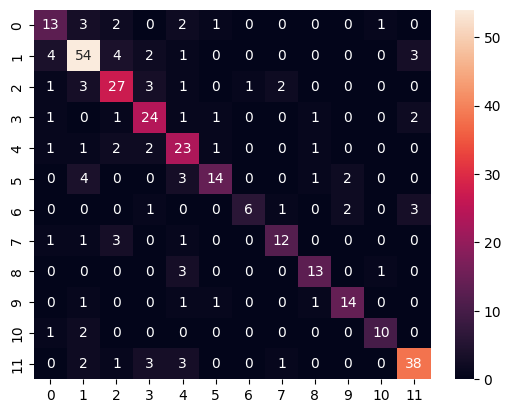

In [38]:
sns.heatmap(cm,annot=True)

# GridSearch

In [39]:
class lfwPeopleDataset():

    def __init__(self, min_faces_per_person):
        self.faces = fetch_lfw_people(min_faces_per_person=min_faces_per_person)

    def draw_sample(self):
        fig, ax = plt.subplots(3, 5)
        for i, axi in enumerate(ax.flat):
            axi.imshow(self.faces.images[i], cmap='bone')
            axi.set(xticks=[], yticks=[],
            xlabel=self.faces.target_names[self.faces.target[i]])

    def get_features_labels(self):
        return self.faces.data, self.faces.target, self.faces.target_names

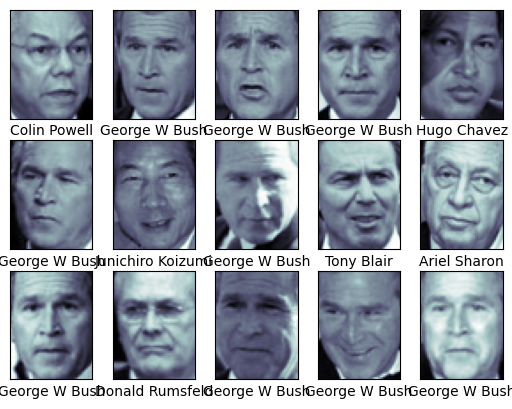

In [40]:
lfw_ds = lfwPeopleDataset(60)
lfw_ds.draw_sample()

In [41]:
features, labels, target_names = lfw_ds.get_features_labels()

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    random_state=42)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [43]:
class GridSearch():
    def __init__(self):
        pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
        svc = SVC(kernel='rbf', class_weight='balanced')
        self.model = make_pipeline(pca, svc)

        param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
        self.grid = GridSearchCV(self.model, param_grid)

    def fit(self, X, y):
        %time self.grid.fit(X, y)
        print(self.grid.best_params_)
        self.model = self.grid.best_estimator_

    def predict(self, X):
        return self.model.predict(X)

    def plot_sample(self, target_names, y_hat):
        fig, ax = plt.subplots(4, 6)
        for i, axi in enumerate(ax.flat):
            axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
            axi.set(xticks=[], yticks=[])
            axi.set_ylabel(target_names[y_hat[i]].split()[-1],
            color='black' if y_hat[i] == y_test[i] else 'red')
            fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

    def report(self, target_names, y, y_hat):
        print(classification_report(y, y_hat,
              target_names=target_names))

    def heatmap(self, target_names, y, y_hat):
        mat = confusion_matrix(y, y_hat)
        sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
        xticklabels=target_names,
        yticklabels=target_names)
        plt.xlabel('true label')
        plt.ylabel('predicted label')

In [44]:
grid = GridSearch()

In [45]:
grid.fit(X_train, y_train)

CPU times: user 54.1 s, sys: 40.2 s, total: 1min 34s
Wall time: 1min 1s
{'svc__C': 5, 'svc__gamma': 0.001}


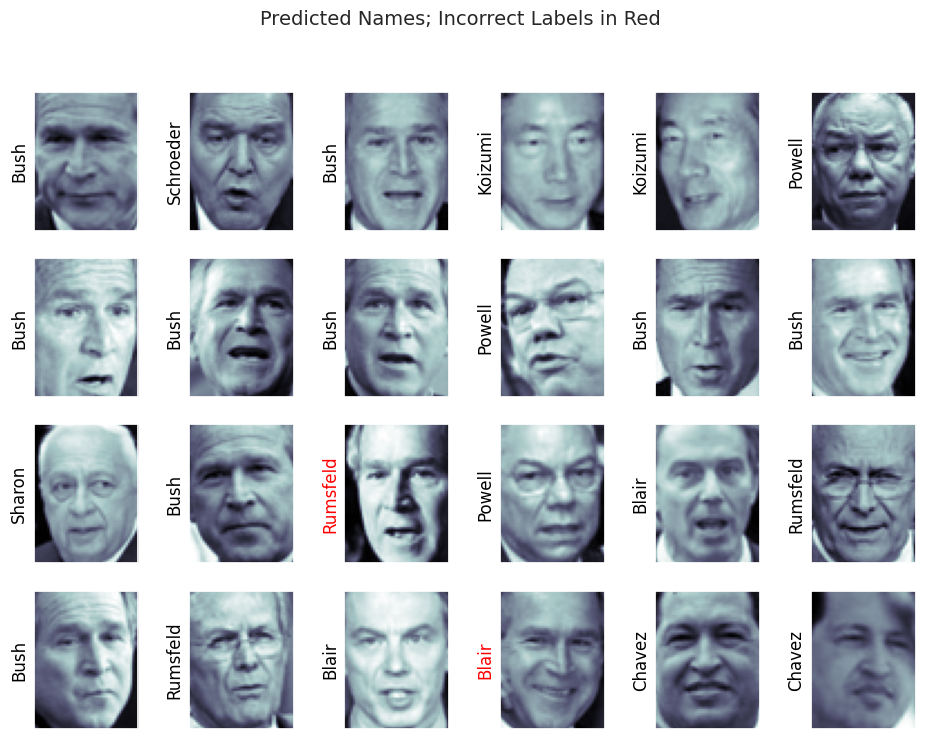

In [46]:
y_hat = grid.predict(X_test)
grid.plot_sample(target_names, y_hat)

In [47]:
grid.report(target_names, y_test, y_hat)

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



In [48]:
GS = accuracy_score(y_test,y_hat)
GS

0.8486646884272997

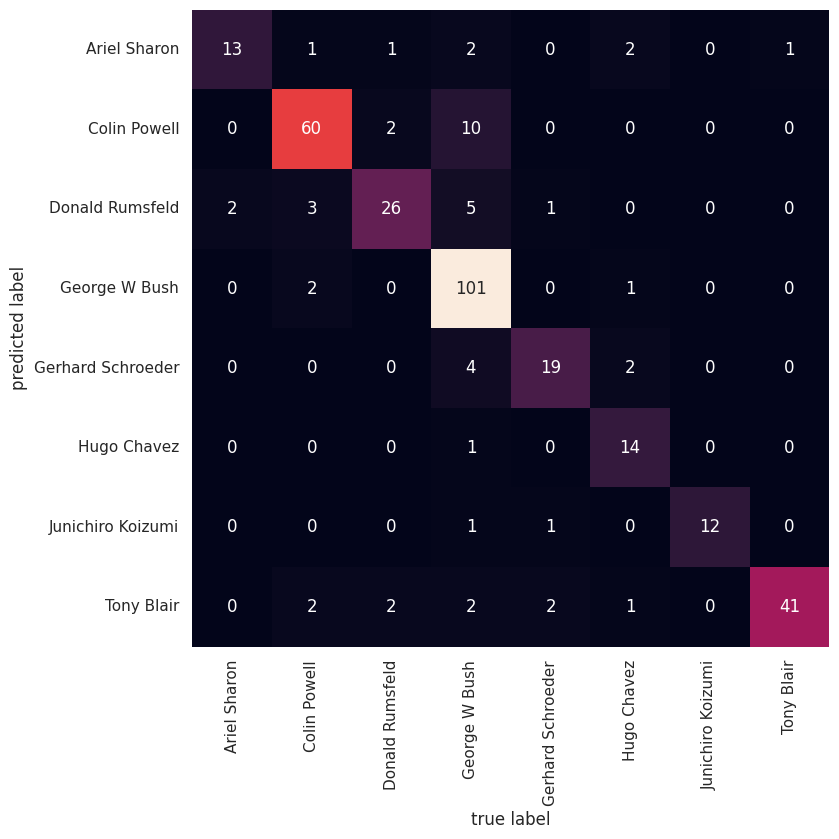

In [49]:
grid.heatmap(target_names, y_test, y_hat)

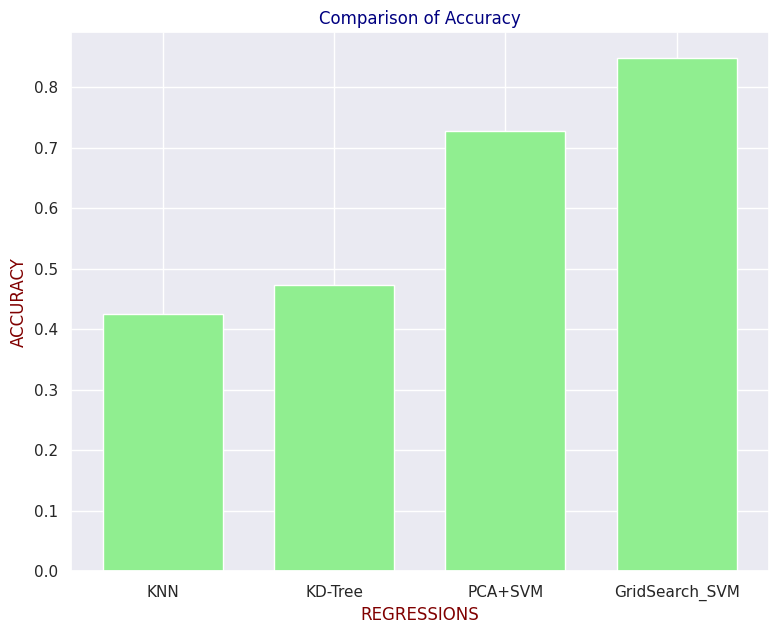

In [50]:
x=['KNN','KD-Tree','PCA+SVM','GridSearch_SVM']
y=[KNN,KDTREE,PSVM,GS]
plt.figure(figsize=(9,7))
plt.bar(x,y, width = 0.7 ,color='lightgreen')
plt.xlabel('REGRESSIONS', color='maroon')
plt.ylabel("ACCURACY", color='maroon' )
plt.title('Comparison of Accuracy', color='navy')
plt.show()